<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Paloma   &   Kiara Puente
             

**Fecha:** 02 de Marzo del 2020.

**Expediente** : 
                706674 707429

**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline


### CLASE 9 

#### Ejemplo 3 
1.
El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique en una gráfica el historias 100 muestras generadas y comparela con el función F(x) dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

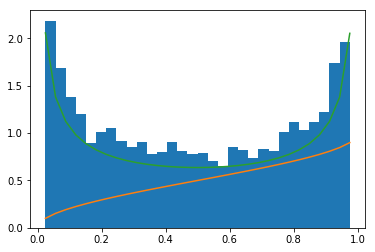

In [2]:
F = lambda x:2*np.arcsin(np.sqrt(x))/np.pi
X_f = lambda U:(np.sin((np.pi*U)/2))**2
f = lambda x: (1/np.pi)*(1/(np.sqrt(1-x)*np.sqrt(x)))
N = 3000
U = np.random.uniform(0.1,0.9,N) #Usamos este, dando valores para que no se vaya al infinito
x = X_f(U)
y,xn,ig=plt.hist(x,bins=30,density=True);
plt.plot(xn,F(xn))
plt.plot(xn,f(xn))
plt.show()

#### Ejemplo binomial: 
2.
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
#### Tarea: Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$
    
**El Algoritmo que debemos realizar:**
   1. Generar $U$.
   2. Si $U<p_0$, poner $X=0$ y detenerse.
   3. Si $p_0<U<p_0+p_1$, poner $X=1$ y detenerse.
   $$ \vdots$$
   4. Si $p_0+\cdots+p_{n-1}<U<p_0+\cdots+p_{n}$, poner $X=n$ y detenerse.

$$p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
$$P_{i+1}=\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)} =$$
$$ \frac{n!}{(i+1)!(i)!} \frac{n-i}{(n-i)!} {p^{i}p(1-p)^{n-i}}(1-p)^{-1} =$$
$$p_i=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$
$$p_{i+1}=\frac{n-i}{(1+i)}P \frac {p_i}{1-p}$$

Es mejor que sea recursiva ya que no necesitamos saber el anterior para poder sacar cierto numero 

#### Tarea
3.
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
Demuestre matemáticamente que 
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$
y a partir de esta relación genere variables aletorias que distribuyen poisson.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(1+k)k!}$$
$$P(k + 1)=\frac{\lambda}{(1+k)} P(k,\lambda) $$

### CLASE 10 

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:


1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [4]:
import scipy.optimize as opt

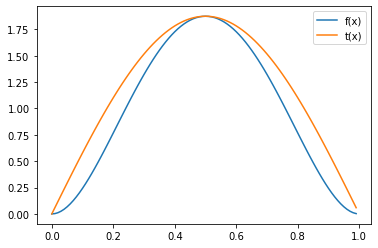

In [8]:
f = lambda x: 30*(x**2-2*x**3+x**4)
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc="best")
plt.show()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

$$g(x)=\frac{t(x)}{c}$$
$$t(x)=a \sin(\pi x)$$
$$max(t(x))=max(f(x))$$
$$a=c$$
$$g(x)=\frac{a \sin(\pi x)}{c}$$
Se eliminan a y c porque son iguales
$$g(x)=\sin(\pi x)$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

Integrar y sacar la inversa 
$$g(x)=\sin(\pi x)$$
$$\int_{0}^{x} sin(\pi y) \ dy = -\displaystyle\frac{1}{\pi} cos(\pi y)  |_0^x = -\frac{1}{\pi} cos(\pi x) + \frac{1}{\pi} = U$$
$$cos(\pi x) = -\pi (U- \frac{1}{\pi})$$
$$cos(\pi x) = 1 - \pi U$$
$$x = \frac{1}{\pi} \arccos{(1- \pi U)} $$


4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
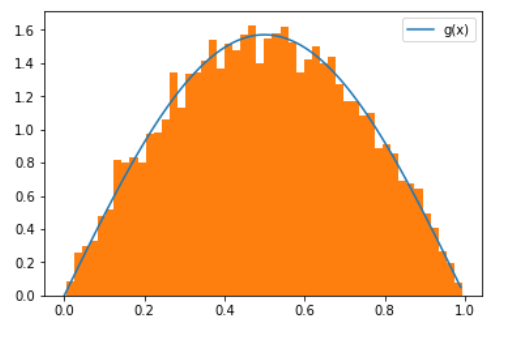

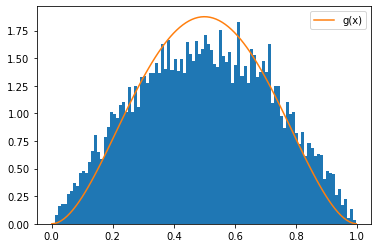

In [10]:
f = lambda x: 30*(x**2-2*x**3+x**4)
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: a*np.sin(np.pi*x)
g = lambda x: np.sin(np.pi*x)
G = lambda x: -(1/np.pi)*(np.cos(np.pi*x))+(1/np.pi)
x_g = lambda U: (1/np.pi)*(np.arccos(1-np.pi*U))
N = 10000
U = np.random.uniform(0,2/np.pi,N)
x = x_g(U)
y,xn,ig = plt.hist(x, bins=100, density = True)
plt.plot(xn,f(xn),label='g(x)')
plt.legend()
plt.show()

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
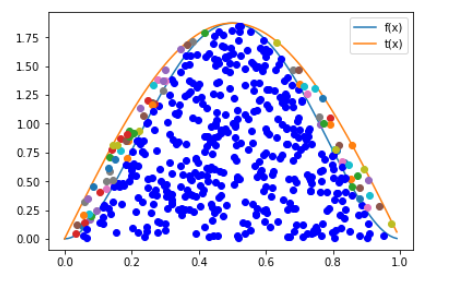

In [12]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    plt.show()

ValueError: operands could not be broadcast together with shapes (500,) (10000,) 

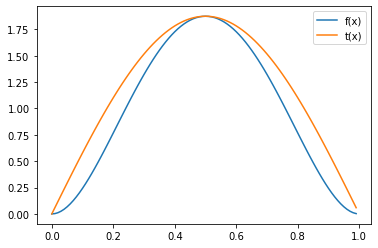

In [13]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t 
t = lambda x: a*np.sin(np.pi*x)

x = np.arange(0,1,0.01) 

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

N = 500 
R2 = np.random.rand(N)
R1 = x_g(U)

Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [29]:
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#    R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    c=np.zeros(len(R1))
    condition = np.multiply(R2,t_x)<=f_x
    c = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return c

In [30]:
Aceptacion_S = Acep_rechazo2(R2,R1,f,t)/len(R1)
print('El porcentaje de puntos aceptados cuando usas un pulso senoidal es:',Aceptacion_S*100,'%')  

El porcentaje de puntos aceptados cuando usas un pulso senoidal es: 86.4 %


In [33]:
# C como constante
f = lambda x:30*(x**2-2*x**3+x**4)
a = f(opt.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: a*np.ones(len(x))

N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N)


In [34]:
Aceptacion_C= Acep_rechazo2(R2,R1,f,t)/len(R1)
print('El porcentaje de puntos aceptados cuando usas constante es:',Aceptacion_C*100,'%')  

El porcentaje de puntos aceptados cuando usas constante es: 50.0 %


##### Podemos observar que cuando se utiliza el pulso senoidal es mucho más alto el porcentaje ya que este se asemeja más y está menos alejado de la función que nosotros tenemos ; mientras que con la constante al ser una linea recta en el punto máximo el área hasta la función es mucho mayor. 

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

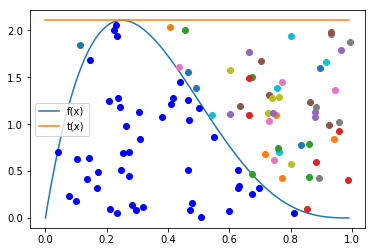

In [37]:
f = lambda x: 20*x*(1-x)**3
a = f(opt.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: a*np.ones(len(x))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc="best")
N= 100
R2 = np.random.rand(N)
R1 = np.random.rand(N)
Acep_rechazo(R1, R2, f, t)